## Binary Classification: Pima Indians Diabetes Dataset
https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

** Dataset Information: **

Selected medical exams from a large database (total 768 cases) for females at least 21 years old of Pima Indian heritage.

** Attribute Information: (8 features and 1 class)**

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

** Objective of this project **

predict whether a patient has diabetes (class; 0 or 1) based on diagnostic variables (features)

## Data

In [25]:
options(warn=-1)
# Load Data
df  <- read.csv('pima-indians-diabetes.data',header=FALSE)
colnames(df) = c('Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'label')

In [26]:
# Inspect Data
head(df,3)

Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,label
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


In [27]:
dim(df)

[1] 768   9

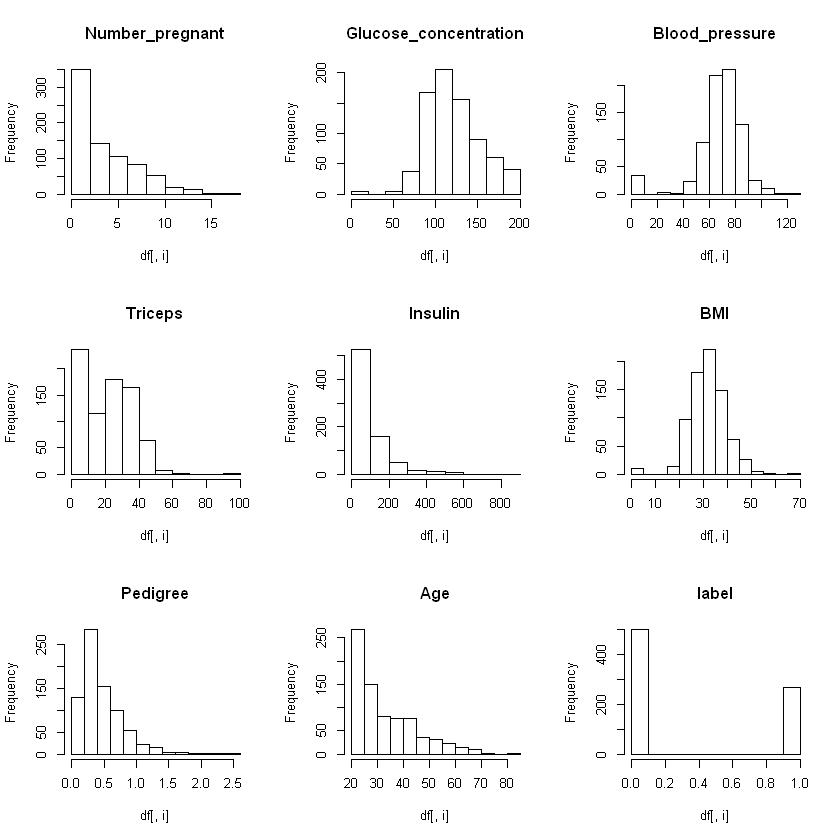

In [28]:
par(mfrow=c(3,3))
for(i in 1:9) {
    hist(df[,i], main=names(df)[i])
}

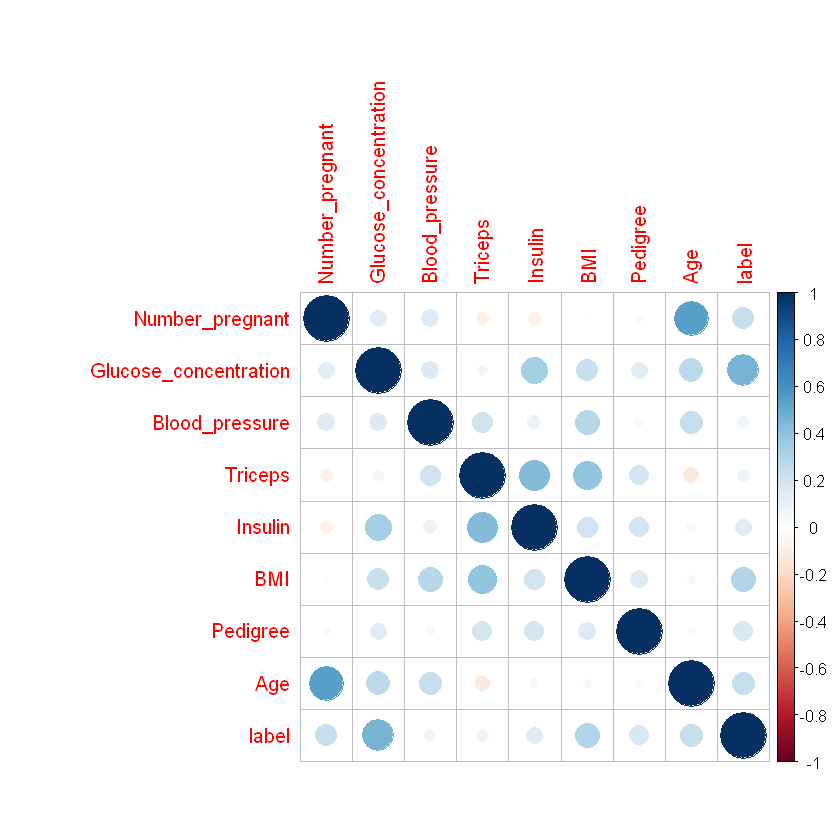

In [29]:
library(corrplot)
corrplot(cor(df), method="circle")

In [30]:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Number_pregnant      : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose_concentration: int  148 85 183 89 137 116 78 115 197 125 ...
 $ Blood_pressure       : int  72 66 64 66 40 74 50 0 70 96 ...
 $ Triceps              : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin              : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                  : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ Pedigree             : num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                  : int  50 31 32 21 33 30 26 29 53 54 ...
 $ label                : int  1 0 1 0 1 0 1 0 1 1 ...


In [31]:
summary(df)

 Number_pregnant  Glucose_concentration Blood_pressure      Triceps     
 Min.   : 0.000   Min.   :  0.0         Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0         1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0         Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9         Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2         3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0         Max.   :122.00   Max.   :99.00  
    Insulin           BMI           Pedigree           Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
     label      
 Min.   :0

In [32]:
table(df$label) #imbalanced labels


  0   1 
500 268 

In [33]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [34]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

** Encode label **

In [35]:
df$label = factor(df$label, labels=c(0,1))
table(df$label)
str(df)


  0   1 
500 268 

'data.frame':	768 obs. of  9 variables:
 $ Number_pregnant      : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose_concentration: int  148 85 183 89 137 116 78 115 197 125 ...
 $ Blood_pressure       : int  72 66 64 66 40 74 50 0 70 96 ...
 $ Triceps              : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin              : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                  : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ Pedigree             : num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                  : int  50 31 32 21 33 30 26 29 53 54 ...
 $ label                : Factor w/ 2 levels "0","1": 2 1 2 1 2 1 2 1 2 2 ...


** Split Train Test Sets **

In [36]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [37]:
# standardize data
train_set[-9] = scale(train_set[-9])
test_set[-9] = scale(test_set[-9])
#summary(train_set)

## Baseline Model


Call:
summary.resamples(object = results)

Models: lda, logistic, glmnet, svm, knn, nb, cart, c50, bagging, rf, gbm 
Number of resamples: 5 

Accuracy 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda      0.6829268 0.7049180 0.7886179 0.7637478 0.8211382 0.8211382    0
logistic 0.6910569 0.7131148 0.8048780 0.7718912 0.8211382 0.8292683    0
glmnet   0.6910569 0.7131148 0.8048780 0.7718912 0.8211382 0.8292683    0
svm      0.7131148 0.7154472 0.7886179 0.7686392 0.8048780 0.8211382    0
knn      0.6721311 0.7073171 0.7560976 0.7441823 0.7886179 0.7967480    0
nb       0.6967213 0.7398374 0.7479675 0.7474743 0.7560976 0.7967480    0
cart     0.6910569 0.6967213 0.7642276 0.7442223 0.7723577 0.7967480    0
c50      0.7049180 0.7317073 0.7398374 0.7556178 0.7886179 0.8130081    0
bagging  0.6803279 0.7723577 0.7723577 0.7702119 0.8048780 0.8211382    0
rf       0.7213115 0.7235772 0.7723577 0.7670265 0.7967480 0.8211382    0
gbm      0.7073171 0.7131148 0.77

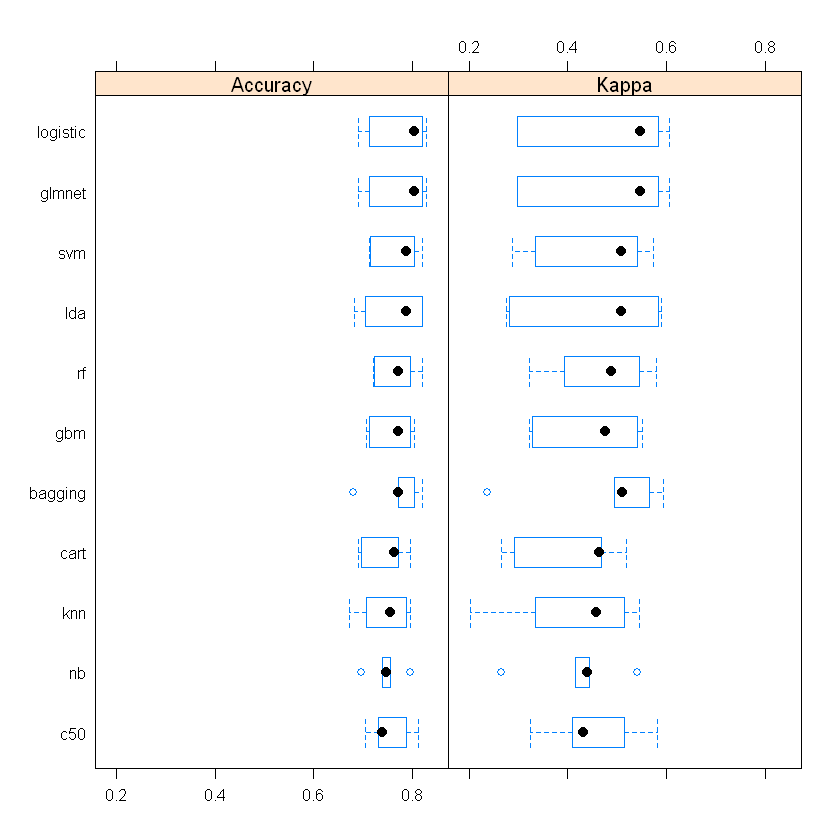

In [38]:
# cross validation
trControl <- trainControl(method="cv", number=5)
metric <- "Accuracy"

# train multiple models
# Linear Discriminant Analysis
set.seed(seed)
fit.lda <- train(label~., data=train_set, method="lda", 
                 metric=metric, trControl=trControl)
# Logistic Regression
set.seed(seed)
fit.glm <- train(label~., data=train_set, method="glm", 
                 metric=metric, trControl=trControl)
# GLMNET
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)
# Naive Bayes
set.seed(seed)
fit.nb <- train(label~., data=train_set, method="nb", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# C5.0
set.seed(seed)
fit.c50 <- train(label~., data=train_set, method="C5.0", 
                 metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)

# summarise results
results <- resamples(list(lda=fit.lda, logistic=fit.glm, glmnet=fit.glmnet,
    svm=fit.svmRadial, knn=fit.knn, nb=fit.nb, cart=fit.cart, c50=fit.c50,
    bagging=fit.treebag, rf=fit.rf, gbm=fit.gbm))
summary(results)
bwplot(results)

## Parameter Tuning
5 best algorithms: glmnet/logistic, bagging, svm, rf

tuning parameters: http://topepo.github.io/caret/available-models.html

In [39]:
trControl <- trainControl(method='cv', number=5)
metric <- 'Accuracy'

#### Model 1: GLMNET


glmnet 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0.000   0.7670132  0.4553991
  0.001   0.7670132  0.4553991
  0.002   0.7670132  0.4553991
  0.003   0.7654005  0.4515488
  0.004   0.7670265  0.4544708
  0.005   0.7670265  0.4544708
  0.006   0.7621485  0.4426551
  0.007   0.7621485  0.4426551
  0.008   0.7621485  0.4416993
  0.009   0.7670265  0.4511692
  0.010   0.7670265  0.4511692
  0.011   0.7686525  0.4544080
  0.012   0.7702786  0.4576840
  0.013   0.7686392  0.4530048
  0.014   0.7670132  0.4484872
  0.015   0.7637478  0.4389906
  0.016   0.7637478  0.4389906
  0.017   0.7637478  0.4389906
  0.018   0.7621218  0.4346097
  0.019   0.7604958  0.4302349
  0.020   0.7621218  0.4335814
  0.021   0.7621218  0.4335814
  0.022   0.7621218  0.4335814
  0.023   0.7637478  0.4365610
  0.024   0.76

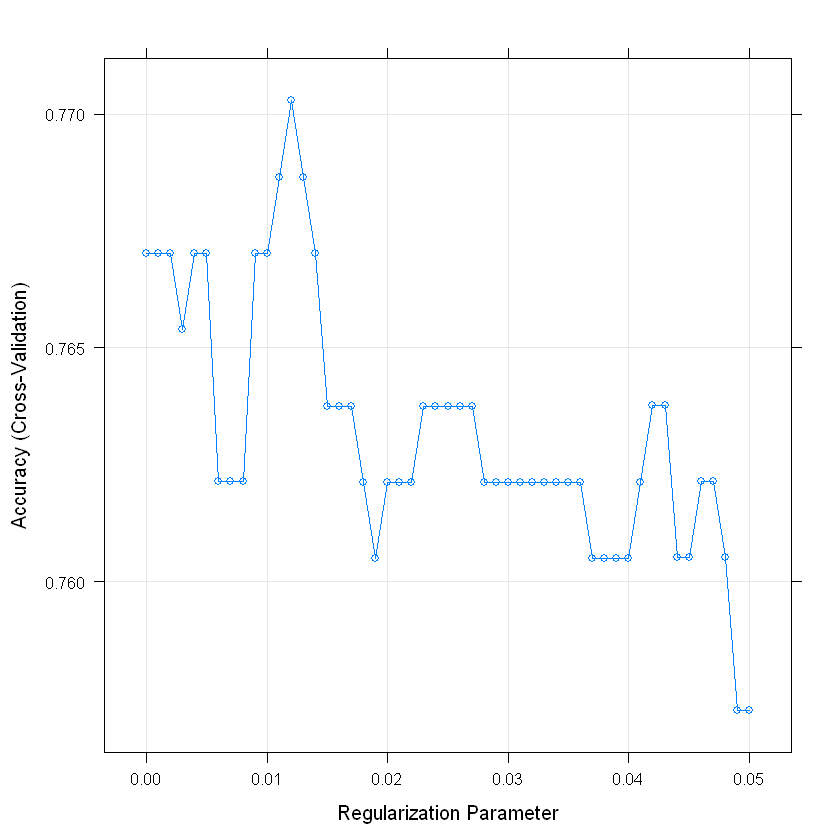

In [40]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(alpha = 1,lambda = seq(0,0.05,by = 0.001))                       
gridSearch <- train(label~., data=train_set, method='glmnet',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 2. Logistic Regression

In [41]:
# grid search --> no tuning parameter
set.seed(seed)
gridSearch <- train(label~., data=train_set, method='glm',
                 metric=metric, trControl=trControl)
print(gridSearch)

Generalized Linear Model 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results:

  Accuracy   Kappa    
  0.7718912  0.4662669



#### Model 3. Bagging

In [42]:
# grid search --> no tuning parameter
set.seed(seed)
gridSearch <- train(label~., data=train_set, method='treebag',
                 metric=metric, trControl=trControl)
print(gridSearch)

Bagged CART 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results:

  Accuracy   Kappa    
  0.7702119  0.4799116



#### Model 4. Support Vector Machine 

Support Vector Machines with Radial Basis Function Kernel 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results across tuning parameters:

  sigma  C    Accuracy   Kappa    
  0.001  0.1  0.6514727  0.0000000
  0.001  1.0  0.6514727  0.0000000
  0.001  2.0  0.7002666  0.2044703
  0.001  3.0  0.7491403  0.3786594
  0.001  4.0  0.7588831  0.4160781
  0.010  0.1  0.6514727  0.0000000
  0.010  1.0  0.7735306  0.4627720
  0.010  2.0  0.7751699  0.4679623
  0.010  3.0  0.7686392  0.4537437
  0.010  4.0  0.7686525  0.4526310
  0.050  0.1  0.7312408  0.3133870
  0.050  1.0  0.7637612  0.4428967
  0.050  2.0  0.7556044  0.4238363
  0.050  3.0  0.7588431  0.4341029
  0.050  4.0  0.7572171  0.4310110
  0.100  0.1  0.7198454  0.2791114
  0.100  1.0  0.7604825  0.4402184
  0.100  2.0  0.7523391  0.4237718
  0.100  3.0  0.7442090  0.4051447
  0.100  4.0  0.7491137  0.4203879
  1

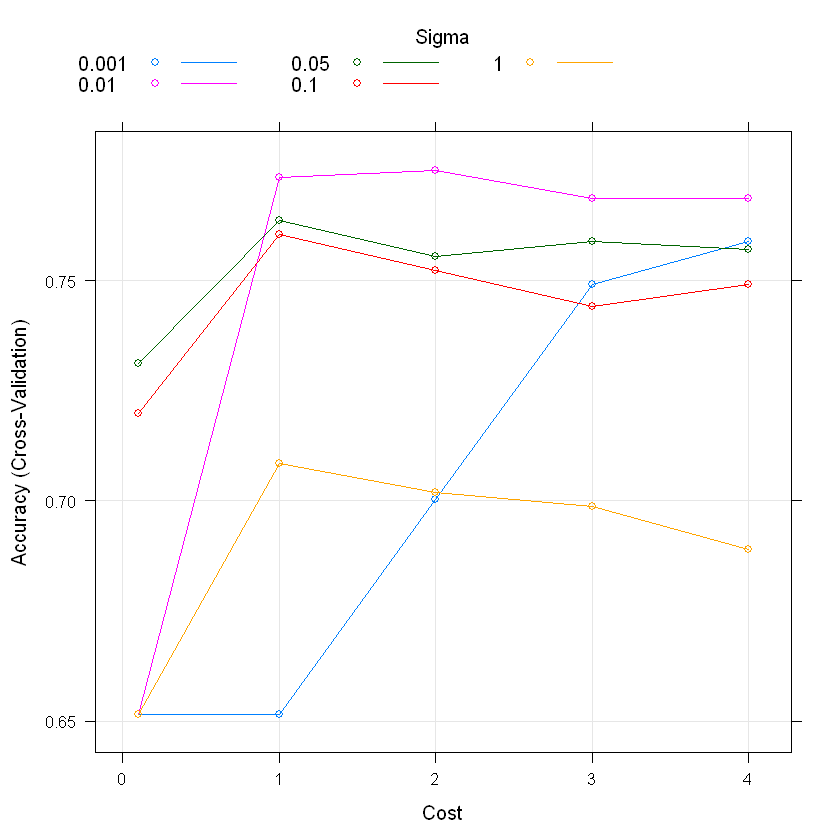

In [43]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.sigma=c(0.001,0.05,0.01,0.1,1), .C=c(0.1,1,2,3,4))
gridSearch <- train(label~., data=train_set, method='svmRadial',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 5: Random Forest 

Random Forest 

614 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 491, 492, 491, 491, 491 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.7605091  0.4403025
   2    0.7718912  0.4738917
   3    0.7718779  0.4761667
   4    0.7735173  0.4799809
   5    0.7686392  0.4714725
   6    0.7653739  0.4615099
   7    0.7653739  0.4628497
   8    0.7604958  0.4526637
   9    0.7702519  0.4766825
  10    0.7670132  0.4697519

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.


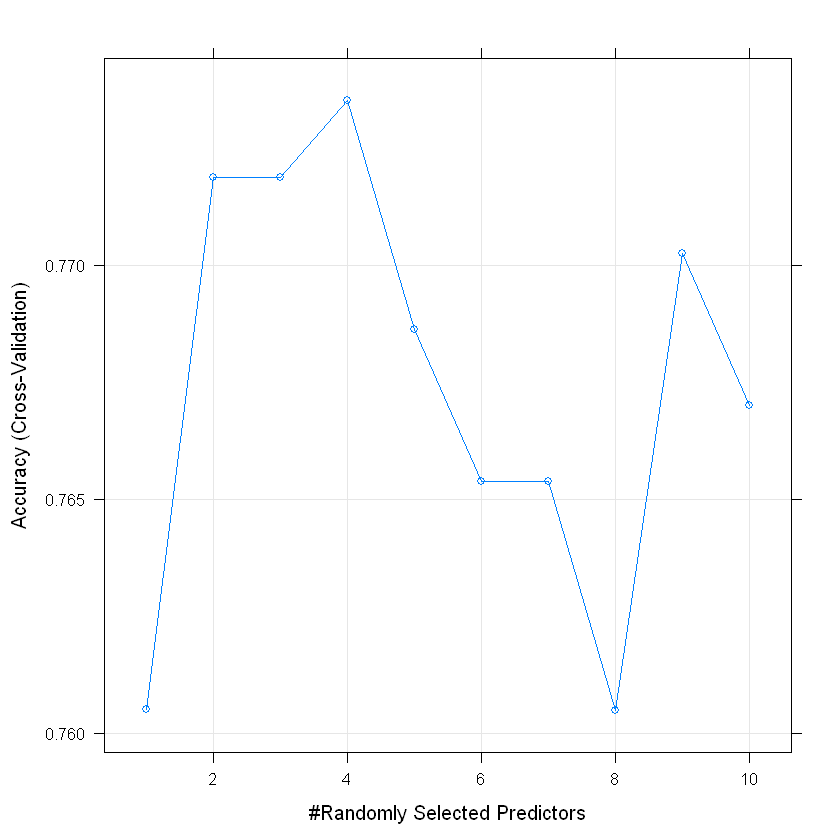

In [44]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.mtry=c(1:10))
gridSearch <- train(label~., data=train_set, method='rf',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

## Final Model: Support Vector Machine (SVM)

#### Params: sigma = 0.01 and C = 2

In [45]:
library(kernlab)
final.model <- ksvm(label~., data=train_set, kernel="rbfdot",
                    kpar=list(sigma=0.01), C=2, cross=10)
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.01 

Number of Support Vectors : 353 

Objective Function Value : -661.8095 
Training error : 0.216612 
Cross validation error : 0.224749 


#### Save and load the final model

In [46]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [47]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.01 

Number of Support Vectors : 353 

Objective Function Value : -661.8095 
Training error : 0.216612 
Cross validation error : 0.224749 


#### Final Model Evaluation with Test set

In [48]:
predictions = predict(final.model, newdata = test_set[-9])
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 92 21
         1  8 33
                                          
               Accuracy : 0.8117          
                 95% CI : (0.7409, 0.8701)
    No Information Rate : 0.6494          
    P-Value [Acc > NIR] : 7.279e-06       
                                          
                  Kappa : 0.5622          
 Mcnemar's Test P-Value : 0.02586         
                                          
            Sensitivity : 0.9200          
            Specificity : 0.6111          
         Pos Pred Value : 0.8142          
         Neg Pred Value : 0.8049          
             Prevalence : 0.6494          
         Detection Rate : 0.5974          
   Detection Prevalence : 0.7338          
      Balanced Accuracy : 0.7656          
                                          
       'Positive' Class : 0               
                                          

## Summary

- Best model: **SVM** w/ param: sigma=0.01, C=2


- Accuracy of test set: **81.2%**